# 한글 Word2Vec 만들기

# !pip install konlpy > /dev/null

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="F:/Workspace/data/ratings.txt")

('F:/Workspace/data/ratings.txt', <http.client.HTTPMessage at 0x23cf3dadb20>)

In [8]:
df = pd.read_table('F:/Workspace/data/ratings.txt')

In [9]:
df[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


## 데이터 전처리

In [11]:
df.shape, df.document.nunique() #중복여부

((200000, 3), 194543)

In [12]:
df.drop_duplicates(subset=['document'], inplace=True)
df.shape

(194544, 3)

In [13]:
df.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [14]:
df.dropna(inplace=True) ## Null 데이터 제거
df.shape

(194543, 3)

## 한글전처리

In [15]:
# 한글과 공백이외는 제거
df['document'] = df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
df.head(3)

<ipython-input-15-27e0880e6851>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1


In [16]:
import numpy as np

In [18]:
#한글 제외하고도 '' 데이터들 날려야한다 즉 영어로 적혀있더 데이터들이 널값이되어서 날리는거
df['document'].replace('', np.nan, inplace=True)
df.document.isnull().sum()

491

In [19]:
df.dropna(how='any', inplace=True)
df.shape

(194052, 3)

# 한글처리

In [20]:
dfs = pd.read_csv('data/한국어불용어100.txt', sep='\t', header=None)

In [22]:
dfs.head()

,0,1,2
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898


In [30]:
stopwords = set(dfs[0]) # 위 stopwords 불량이다
len(stopwords)
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

## 한글 형태소 분석

In [31]:
okt =Okt()
from tqdm import tqdm_notebook
tokenized_data = []
for sentence in tqdm_notebook(df.document): #tqdm이 뭐지
    morphs = okt.morphs(sentence.strip(), stem=True)
    #이제 stopwords 불용어 배제
    temp_str = [word for word in morphs if not word in stopwords]
    
    tokenized_data.append(temp_str)

<ipython-input-31-41241fc819ec>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(df.document): #tqdm이 뭐지


  0%|          | 0/194052 [00:00<?, ?it/s]

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.996325727124688


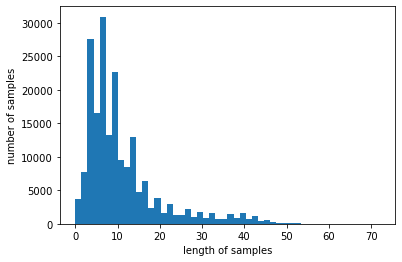

In [32]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Wird2 vec 훈련시키기

In [33]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size= 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [34]:
model.wv.vectors.shape

(16466, 100)

In [47]:
model.wv.most_similar("최민식")

[('박중훈', 0.8680850267410278),
 ('한석규', 0.8608192801475525),
 ('안성기', 0.8485894799232483),
 ('이민호', 0.8455548882484436),
 ('김명민', 0.8389871120452881),
 ('김수현', 0.8358795046806335),
 ('설경구', 0.8321431875228882),
 ('윤제문', 0.8266410827636719),
 ('채민서', 0.8220387101173401),
 ('이정재', 0.8193599581718445)]

In [48]:
model.wv.most_similar("히어로")

[('슬래셔', 0.8786779046058655),
 ('호러', 0.8713412284851074),
 ('무협', 0.8496500253677368),
 ('느와르', 0.843263566493988),
 ('물의', 0.8330205678939819),
 ('블록버스터', 0.8308538198471069),
 ('물', 0.8294035196304321),
 ('멜로', 0.8238838315010071),
 ('무비', 0.8088681697845459),
 ('블랙', 0.8042157888412476)]

## 한국어 Word2Vec 만들기